# Лабораторна робота 3

## Завдання 

### 1. Повнозв'язані нейронні мережі
Вирішіть завдання класифікації даних, з якими ви працювали в лабораторній № 1 за допомогою повнозв’язаної нейромережі прямого поширення (fully connected feed-forward network). Результати порівняйте з одержаними раніше. 

### 2. Згорткові нейронні мережі
Вирішіть завдання класифікації зображень за допомогою згорткової (convolutional) нейромережі (якщо в обраному датасеті класів забагато, достатньо залишити 3-5).

### 3. Рекурентні нейронні мережі
Вирішіть задачу класифікації текстів (з якими ви працювали в лабораторній № 2) за допомогою рекурентної нейромережі. Результати порівняйте з одержаними раніш. 

---

    Повнозв'язані нейронні мережі

In [31]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
pd.options.mode.chained_assignment = None

# обробка даних у відповідності до лб 1
df = pd.read_csv("usp_drug_classification.csv")
df = df.dropna()

df_small = df[df['usp_category'].isin( df.usp_category.value_counts().keys()[:5])]

for col in df_small.columns:
    df_small.loc[:,col+"_num"] = (OrdinalEncoder().fit_transform(df_small[col].values.reshape(-1, 1))+1).astype("int")
df_small.head()

X = df_small[df_small.columns[8:]]
y = df_small['usp_category_num']

X = preprocessing.MinMaxScaler().fit_transform(X)

In [32]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

y = LabelBinarizer().fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,stratify=y)
X_train.shape

(430, 6)

In [33]:
y[0]

array([1, 0, 0, 0, 0])

In [34]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(64, input_shape = (6,), activation = "relu"))
model.add(Dense(5, activation = "softmax"))

model.compile(Adam(lr = 0.05), "categorical_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                448       
                                                                 
 dense_5 (Dense)             (None, 5)                 325       
                                                                 
Total params: 773 (3.02 KB)
Trainable params: 773 (3.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
n = 200
history = model.fit(X_train, y_train,  batch_size=64, validation_split=0.2, verbose=1, epochs=n)

Epoch 1/200


6/6 [==============================] - 1s 46ms/step - loss: 1.5974 - accuracy: 0.2384 - val_loss: 1.5705 - val_accuracy: 0.2674
Epoch 2/200
6/6 [==============================] - 0s 10ms/step - loss: 1.5803 - accuracy: 0.2413 - val_loss: 1.5492 - val_accuracy: 0.3256
Epoch 3/200
6/6 [==============================] - 0s 10ms/step - loss: 1.5669 - accuracy: 0.3343 - val_loss: 1.5310 - val_accuracy: 0.4302
Epoch 4/200
6/6 [==============================] - 0s 10ms/step - loss: 1.5559 - accuracy: 0.3343 - val_loss: 1.5158 - val_accuracy: 0.4302
Epoch 5/200
6/6 [==============================] - 0s 10ms/step - loss: 1.5459 - accuracy: 0.3110 - val_loss: 1.5019 - val_accuracy: 0.3837
Epoch 6/200
6/6 [==============================] - 0s 10ms/step - loss: 1.5361 - accuracy: 0.3110 - val_loss: 1.4901 - val_accuracy: 0.3953
Epoch 7/200
6/6 [==============================] - 0s 10ms/step - loss: 1.5278 - accuracy: 0.3140 - val_loss: 1.4793 - val_accuracy: 0.3953
Epoch 8/200
6/6 [===============

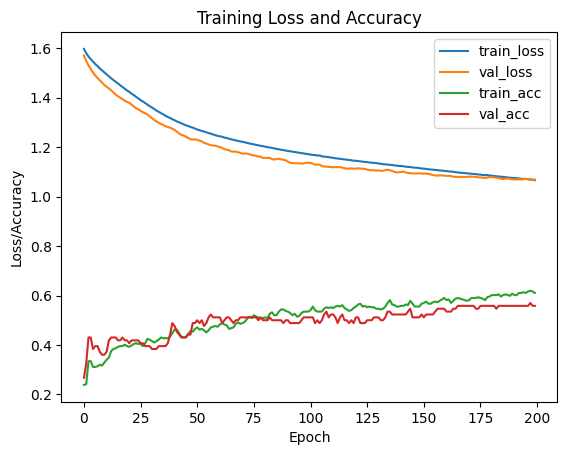

In [36]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
plt.plot(np.arange(0, n), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, n), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, n), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, n), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [37]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.1456525325775146
Test accuracy: 0.5462962985038757


При використанні DecisionTreeClassifier ассuracy було від 0.94, FNN - 0.54. Результати гірші

---

    Згорткові нейронні мережі:

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

car_images = ImageDataGenerator(rescale = 1.0/255).flow_from_directory("CARS",target_size=(64, 64),shuffle=0) 

Found 115 images belonging to 5 classes.


In [39]:
cars_class = ["AUDI",
"Jaguar",
"Lamborghini",
"Mercedes-benz",
"Range Rover"]

In [40]:
X = np.concatenate([car_images.next()[0] for i in range(car_images.__len__())]) 
y = np.concatenate([car_images.next()[1] for i in range(car_images.__len__())])

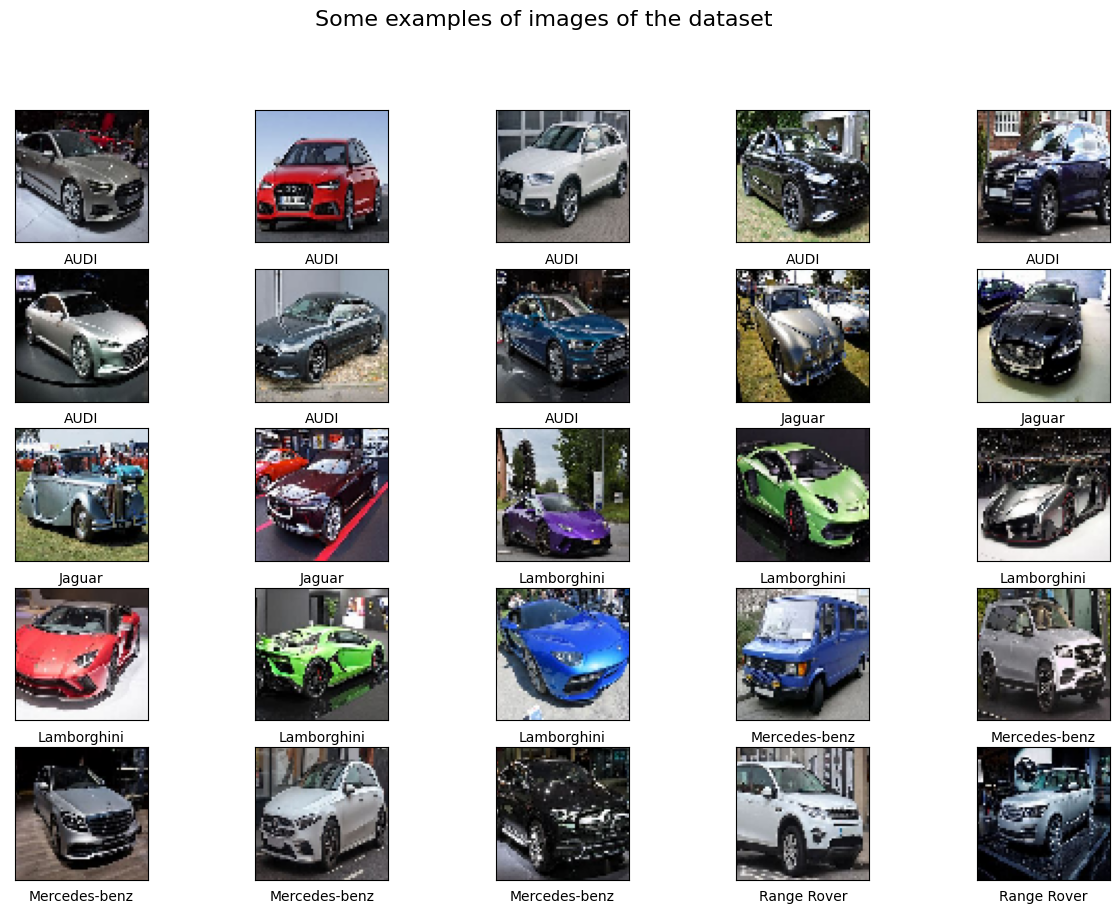

In [41]:
fig = plt.figure(figsize=(15,10))
fig.suptitle("Some examples of images of the dataset", fontsize=16)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X[i*4], cmap=plt.cm.binary)
    plt.xlabel(cars_class[np.argmax(y[i*4])])
plt.show()

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,stratify=y)

In [43]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu', input_shape = (64, 64, 3)), 
    tf.keras.layers.MaxPooling2D(3,3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(5, activation="softmax")
])

In [44]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 62, 62, 128)       3584      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 20, 20, 128)       0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 51200)             0         
                                                                 
 dense_6 (Dense)             (None, 5)                 256005    
                                                                 
Total params: 259589 (1014.02 KB)
Trainable params: 259589 (1014.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [46]:
n = 10
history = model.fit(X_train, y_train,  batch_size=32, validation_split=0.3, verbose=1, epochs=n)

Epoch 1/10


2/2 [==============================] - 1s 298ms/step - loss: 1.6658 - accuracy: 0.2812 - val_loss: 2.1586 - val_accuracy: 0.1071
Epoch 2/10
2/2 [==============================] - 0s 150ms/step - loss: 1.5977 - accuracy: 0.4219 - val_loss: 1.9095 - val_accuracy: 0.1786
Epoch 3/10
2/2 [==============================] - 0s 135ms/step - loss: 1.1122 - accuracy: 0.6094 - val_loss: 1.7619 - val_accuracy: 0.2143
Epoch 4/10
2/2 [==============================] - 0s 152ms/step - loss: 1.0483 - accuracy: 0.5938 - val_loss: 1.5726 - val_accuracy: 0.2500
Epoch 5/10
2/2 [==============================] - 0s 124ms/step - loss: 0.8074 - accuracy: 0.8125 - val_loss: 1.6144 - val_accuracy: 0.2143
Epoch 6/10
2/2 [==============================] - 0s 150ms/step - loss: 0.6340 - accuracy: 0.9375 - val_loss: 1.8874 - val_accuracy: 0.2500
Epoch 7/10
2/2 [==============================] - 0s 135ms/step - loss: 0.5470 - accuracy: 0.8750 - val_loss: 1.6877 - val_accuracy: 0.2500
Epoch 8/10
2/2 [===============

In [47]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.4575666189193726
Test accuracy: 0.3913043439388275


---

    Рекурентні нейронні мережі:

In [48]:
text = pd.read_csv("Emotion_classify_Data.csv")

In [49]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy

nlp = spacy.load("en_core_web_lg") 

# кодування класів
text['emotion_encoded'] = text['Emotion'].map({'joy' : 0, 'fear': 1, 'anger': 2})

# токенізація
def preprocess_text(text):
    doc = nlp(text)
    words = []
    for w in doc:
        if w.is_stop or w.is_punct:
            continue
        words.append(w.lemma_)
    return " ".join(words) 
text['comment_preprocessed'] = text['Comment'].apply(preprocess_text) 

In [50]:
X = text['comment_preprocessed']
y = text['emotion_encoded']

In [51]:
y = tf.keras.utils.to_categorical(y, num_classes=3)

In [52]:
y

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [54]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

dict_size = 1000
tokenizer = Tokenizer(num_words=dict_size)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [55]:
max_seq_len = 64 
X_train = tf.keras.preprocessing.sequence.pad_sequences (X_train, maxlen=max_seq_len)
X_test = tf.keras.preprocessing.sequence.pad_sequences (X_test, maxlen=max_seq_len)

In [56]:
emb_dim = 128

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(dict_size, emb_dim), 
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(3, activation="softmax")
])

In [57]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

n = 10
history = model.fit(X_train, y_train,  batch_size=64, validation_split=0.3, verbose=1, epochs=n)

Epoch 1/10


46/46 [==============================] - 5s 53ms/step - loss: 1.0709 - accuracy: 0.5289 - val_loss: 0.9872 - val_accuracy: 0.7626
Epoch 2/10
46/46 [==============================] - 2s 41ms/step - loss: 0.6829 - accuracy: 0.8514 - val_loss: 0.4937 - val_accuracy: 0.8749
Epoch 3/10
46/46 [==============================] - 2s 40ms/step - loss: 0.2690 - accuracy: 0.9278 - val_loss: 0.3511 - val_accuracy: 0.8949
Epoch 4/10
46/46 [==============================] - 2s 42ms/step - loss: 0.1565 - accuracy: 0.9577 - val_loss: 0.2895 - val_accuracy: 0.9062
Epoch 5/10
46/46 [==============================] - 2s 41ms/step - loss: 0.0926 - accuracy: 0.9725 - val_loss: 0.2797 - val_accuracy: 0.9006
Epoch 6/10
46/46 [==============================] - 2s 40ms/step - loss: 0.0695 - accuracy: 0.9828 - val_loss: 0.2969 - val_accuracy: 0.9038
Epoch 7/10
46/46 [==============================] - 2s 41ms/step - loss: 0.0542 - accuracy: 0.9876 - val_loss: 0.3224 - val_accuracy: 0.9102
Epoch 8/10
46/46 [======

In [58]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.38968873023986816
Test accuracy: 0.8911335468292236


При використанні RandomForest в лб 2 ассuracy було 0.92, тут - 0.89. Результати майже на рівні